In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

import numpy as np
import geopandas as gpd
import pandas as pd

place_name = "Tartu, Estonia"

# POINT (659278.9713042672 6473994.263822624)

graph = ox.graph_from_place(place_name)

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('default')

In [2]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

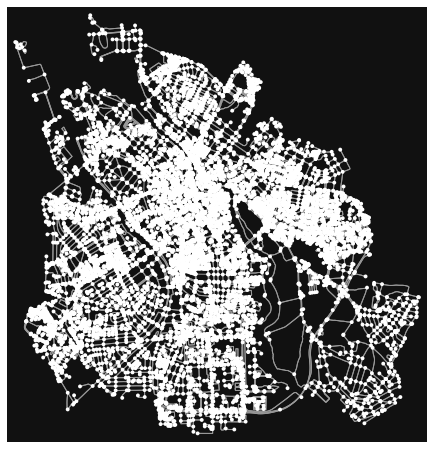

<Figure size 432x288 with 0 Axes>

In [3]:
fig, ax = ox.plot_graph(graph)

plt.tight_layout()

In [4]:
nodes, edges = ox.graph_to_gdfs(graph)

In [5]:
edges.columns

Index(['osmid', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed',
       'length', 'geometry', 'bridge', 'junction', 'service', 'tunnel',
       'access', 'width'],
      dtype='object')

In [6]:
streets_3301 = edges.to_crs(3301)

C:\temp/ipykernel_16504/142875350.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(x, np.float):


<AxesSubplot:>

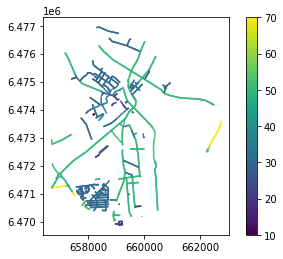

In [7]:
def clean_speed(x):
    try:
        if isinstance(x, str):
            return float(x)
        elif isinstance(x, float):
            return x
        elif isinstance(x, np.int64):
            return x
        elif isinstance(x, np.float):
            return x
        elif x is None:
            return 20
        elif isinstance(x, list):
            return clean_speed(x[0])
        elif np.isnan(x):
            return 20
        else:
            return x
    except:
        print(type(x))
        return 20
    
streets_3301['speed'] = streets_3301['maxspeed'].apply(clean_speed)

streets_3301.plot(column='speed', cmap='viridis', legend=True)

In [8]:
# specify that we're retrieving building footprint geometries
tags = {'building': True}

gdf = ox.geometries_from_place('Kesklinn, Tartu, Estonia', tags)

In [9]:
gdf

c:\dev\conda3\envs\geopy2021a\lib\site-packages\geopandas\_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
c:\dev\conda3\envs\geopy2021a\lib\site-packages\geopandas\_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]


source  \
element_type osmid                               
node         2345996395                    NaN   
way          30221557    Tartu City Government   
             30221588    Tartu City Government   
             30221598    Tartu City Government   
             30221668    Tartu City Government   
...                                        ...   
relation     68816                         NaN   
             3683691                       NaN   
             3715090                       NaN   
             7560843                       NaN   
             11377408                      NaN   

                                                                  geometry  \
element_type osmid                                                           
node         2345996395                          POINT (26.71552 58.37320)   
way          30221557    POLYGON ((26.71092 58.38214, 26.71117 58.38227...   
             30221588    POLYGON ((26.71623 58.38370, 26.71638 58.38364...   
             30221598    POLYGON ((26.71707 58.38334, 26.71716 58.38329...   
             30221668    POLYGON ((26.71334 58.37979, 26.71328 58.37978...   
...                                                                    ...   
relation     68816       POLYGON ((26.72078 58.38057, 26.72129 58.38068...   
             3683691     POLYGON ((26.72247 58.38149, 26.72246 58.38149...   
             3715090     POLYGON ((26.72228 58.37951, 26.72243 58.37953...   
             7560843     POLYGON ((26.72053 58.38101, 26.72085 58.38106...   
             11377408    POLYGON ((26.72346 58.38060, 26.72336 58.38074...   

                        man_made amenity operator wheelchair building  \
element_type osmid                                                      
node         2345996395      NaN     NaN      NaN        NaN      yes   
way          30221557        NaN     NaN      NaN        NaN   school   
             30221588        NaN     NaN      NaN        NaN      yes   
             30221598        NaN     NaN      NaN        NaN      yes   
             30221668        NaN     NaN      NaN        NaN      yes   
...                          ...     ...      ...        ...      ...   
relation     68816           NaN     NaN      NaN        NaN      yes   
             3683691         NaN     NaN      NaN        NaN      yes   
             3715090         NaN     NaN      NaN        NaN      yes   
             7560843         NaN     NaN      NaN        NaN      yes   
             11377408        NaN     NaN      NaN        NaN      yes   

                                          name height level  ... grades  \
element_type osmid                                           ...          
node         2345996395  TÜ Geograafia osakond    NaN   NaN  ...    NaN   
way          30221557             Joosepi maja    NaN   NaN  ...    NaN   
             30221588                      NaN    NaN   NaN  ...    NaN   
             30221598                      NaN    NaN   NaN  ...    NaN   
             30221668                      NaN    NaN   NaN  ...    NaN   
...                                        ...    ...   ...  ...    ...   
relation     68816                         NaN    NaN   NaN  ...    NaN   
             3683691                       NaN    NaN   NaN  ...    NaN   
             3715090                       NaN    NaN   NaN  ...    NaN   
             7560843                       NaN    NaN   NaN  ...    NaN   
             11377408                      NaN    NaN   NaN  ...    NaN   

                        community_centre automated payment:coins self_service  \
element_type osmid                                                              
node         2345996395              NaN       NaN           NaN          NaN   
way          30221557                NaN       NaN           NaN          NaN   
             30221588                NaN       NaN           NaN          NaN   
             30221598                NaN   

In [10]:
# projects in local UTM zone
gdf_proj = ox.project_gdf(gdf)

In [11]:
gdf_proj.crs

<Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

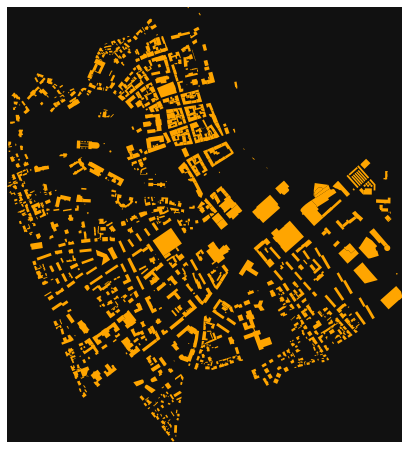

In [12]:
fig, ax = ox.plot_footprints(gdf_proj, filepath="footprints_cache.png", dpi=400, save=True, show=True, close=True)
plt.show()

In [13]:
buildings_3301 = gdf_proj.to_crs(3301)

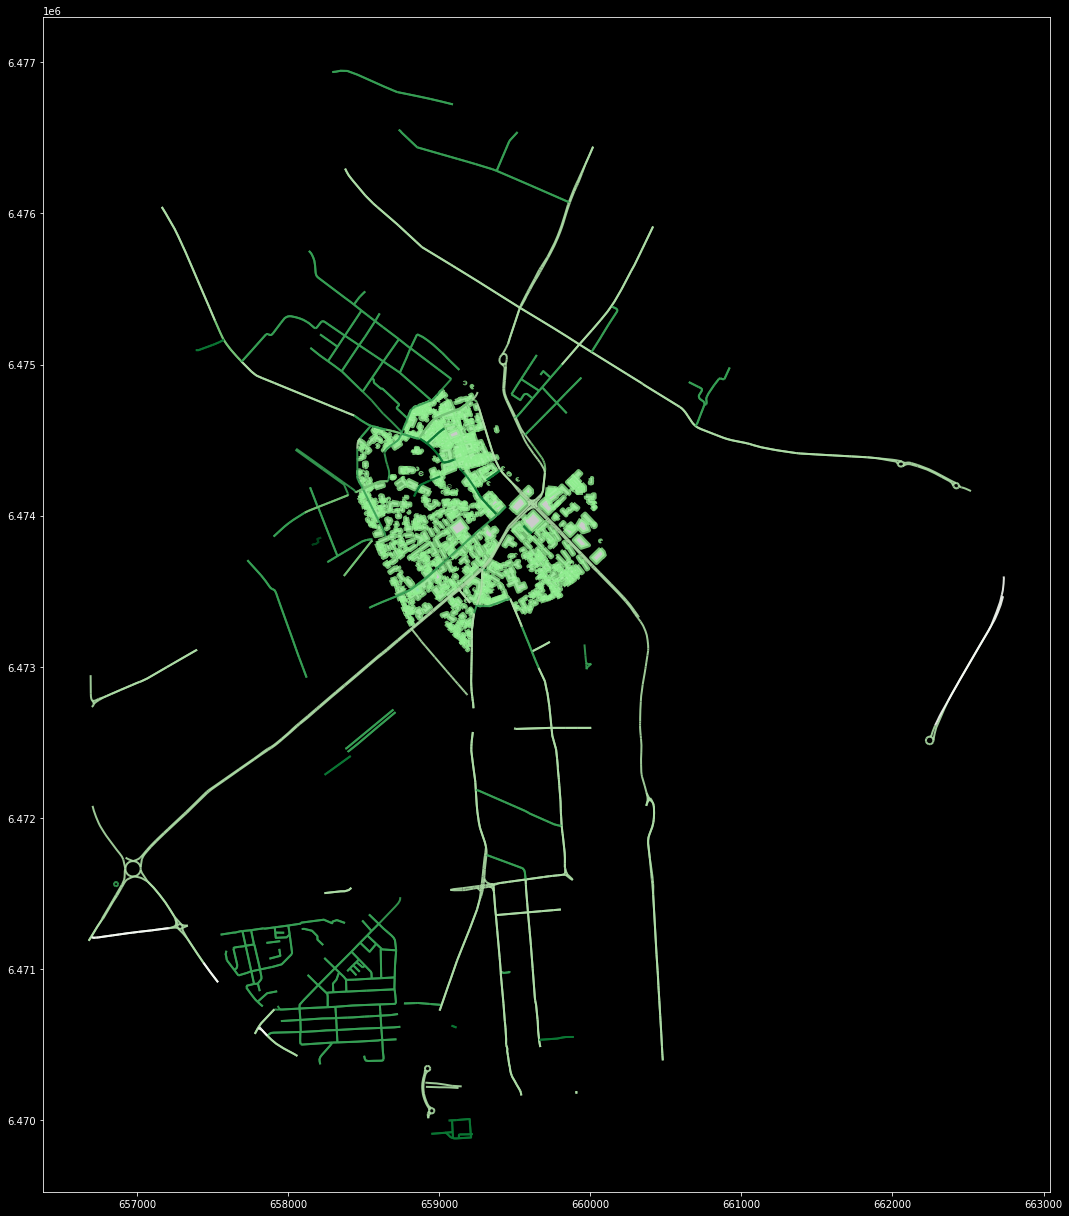

In [14]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(21,17))

streets_3301.plot(ax=ax, linewidth=2, alpha=0.9, column='speed', cmap='Greens_r')

buildings_3301.plot(ax=ax, lw=4, edgecolor='lightgreen', facecolor='white', alpha=0.8)

plt.tight_layout()

## Exploring spatio-temporal urban data

In [15]:
import geopandas as gpd
import pandas as pd

In [16]:
traffic_data = gpd.read_file('test_export_5km_buffer_week.gpkg', driver="GPKG", layer="liiklus")

c:\dev\conda3\envs\geopy2021a\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [17]:
traffic_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       30000 non-null  object  
 1   count      30000 non-null  int64   
 2   lane       30000 non-null  int64   
 3   objectid   30000 non-null  int64   
 4   time       30000 non-null  int64   
 5   text_time  30000 non-null  object  
 6   geometry   30000 non-null  geometry
dtypes: geometry(1), int64(4), object(2)
memory usage: 1.6+ MB


In [23]:
traffic_data.describe()

,count,lane,objectid,time
count,30000.000000,30000.000000,30000.000000,3.000000e+04
mean,30.813167,1.500467,320426.927500,1.615854e+12
std,33.594990,0.500008,17831.580679,8.779583e+08
min,0.000000,1.000000,296864.000000,1.614649e+12
25%,3.000000,1.000000,304459.750000,1.614875e+12
50%,19.000000,2.000000,311959.500000,1.616287e+12
75%,51.000000,2.000000,340661.250000,1.616500e+12
max,436.000000,2.000000,348907.000000,1.617730e+12


In [24]:
traffic_data.head(3)

,name,count,lane,objectid,time,text_time,geometry
0,LKL_Tiksoja,1,2,296992,1616452200041,2021-03-22 22:30:00,POINT (26.65439 58.40841)
1,LKL_Roopa,17,1,296993,1616435100041,2021-03-22 17:45:00,POINT (26.69739 58.34843)
2,LKL_Tiksoja,3,2,296994,1616455800041,2021-03-22 23:30:00,POINT (26.65439 58.40841)


In [25]:

traffic_data['datetime'] = traffic_data['text_time'].apply(pd.to_datetime, infer_datetime_format=True )

In [26]:
traffic_data.head(3)

,name,count,lane,objectid,time,text_time,geometry,datetime
0,LKL_Tiksoja,1,2,296992,1616452200041,2021-03-22 22:30:00,POINT (26.65439 58.40841),2021-03-22 22:30:00
1,LKL_Roopa,17,1,296993,1616435100041,2021-03-22 17:45:00,POINT (26.69739 58.34843),2021-03-22 17:45:00
2,LKL_Tiksoja,3,2,296994,1616455800041,2021-03-22 23:30:00,POINT (26.65439 58.40841),2021-03-22 23:30:00


In [27]:
x = pd.to_datetime(traffic_data['time'], unit='ms')

In [28]:
x.head(3)

0   2021-03-22 22:30:00.041
1   2021-03-22 17:45:00.041
2   2021-03-22 23:30:00.041
Name: time, dtype: datetime64[ns]

In [29]:
print(x.min())
print(x.max())

2021-03-02 01:30:00.041000
2021-04-06 17:30:00.041000


In [30]:
len(traffic_data['name'].unique())

16

In [31]:
traffic_data['name'].value_counts()

LKL_Voru            1885
LKL_Narva_mnt       1881
LKL_Ilmatsalu       1881
LKL_Riia_mnt_LV     1880
LKL_Roomu           1880
LKL_Arukula         1879
LKL_Viljandi_mnt    1876
LKL_Riia_mnt_LS     1876
LKL_Rapina_mnt      1874
LKL_Tiksoja         1873
LKL_Ringtee_3       1872
LKL_Lammi           1871
LKL_Ihaste          1871
LKL_Ringtee_2       1871
LKL_Ringtee_1       1868
LKL_Roopa           1862
Name: name, dtype: int64

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

huls = sns.color_palette("husl")

plt.style.use('ggplot')

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['savefig.transparent'] = False


sns.set_theme(style="whitegrid")
sns.set(rc={'figure.facecolor':'white'})

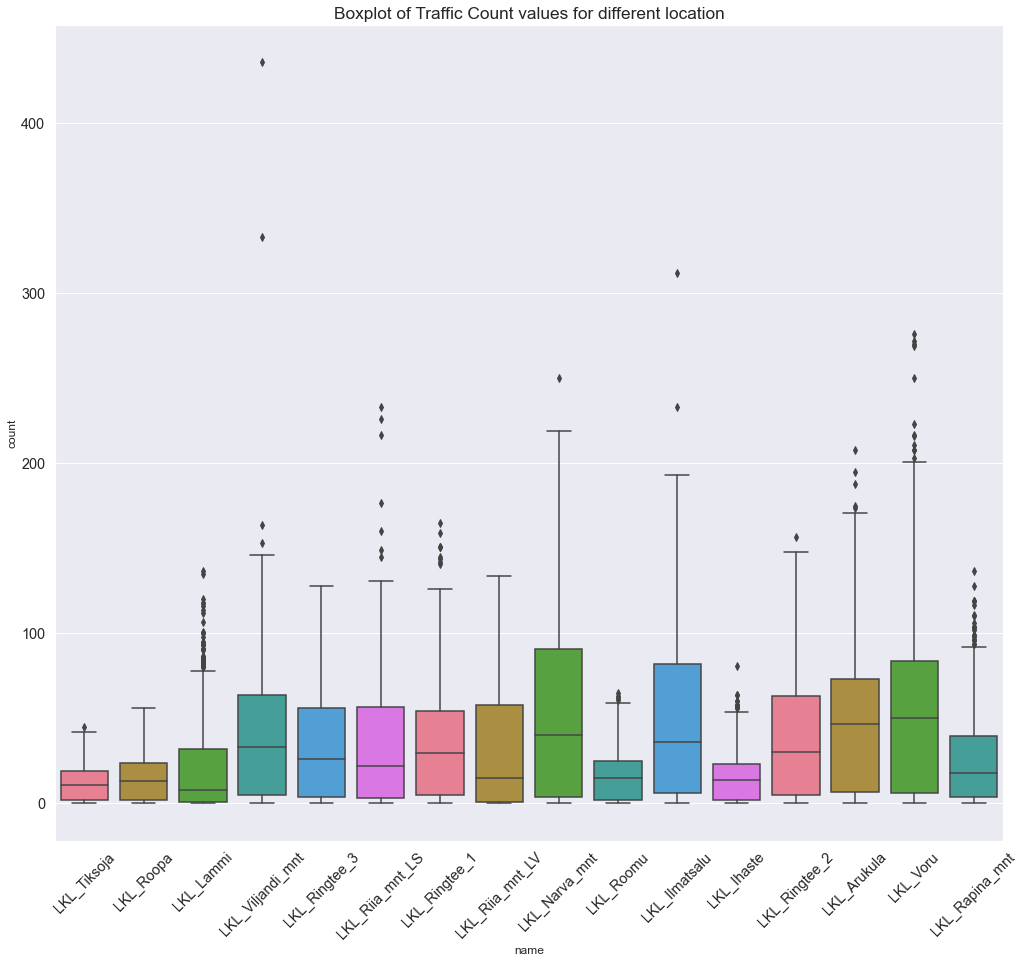

In [35]:
fig, ax = plt.subplots(figsize=(17,15))

sns.boxplot(x='name', y='count', data=traffic_data, palette=huls)

plt.title(f"Boxplot of Traffic Count values for different location", fontsize='x-large')
plt.xticks(rotation=45, fontsize='large')
plt.yticks(fontsize='large')
plt.show()

In [36]:
narva_lk = traffic_data.loc[traffic_data['name'] == "LKL_Narva_mnt"].copy()

<AxesSubplot:xlabel='count', ylabel='Count'>

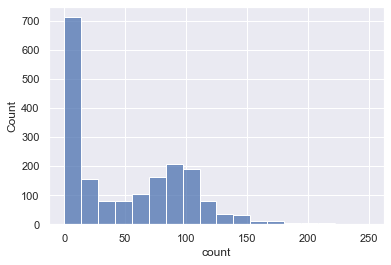

In [37]:
sns.histplot(data=narva_lk, x="count")

In [38]:
narva_lk['hour_of_day'] = narva_lk['datetime'].apply(lambda dtx: dtx.hour)

In [39]:
agg_narva_hours = []

for hod, sub_df in narva_lk.groupby(by='hour_of_day'):
    all_counts = sub_df['count'].sum()
    agg_narva_hours.append( { 'hod': hod, 'count': all_counts}  ) 
    

In [40]:
nava_hod_sum_df = pd.DataFrame(agg_narva_hours).set_index('hod')

<AxesSubplot:xlabel='hod'>

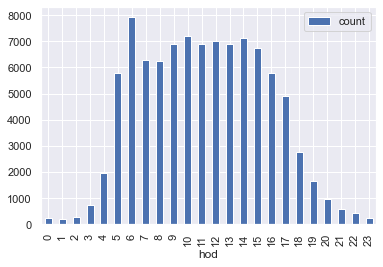

In [41]:
nava_hod_sum_df.plot(kind='bar')

In [106]:
traffic_data['hour_of_day'] = traffic_data['datetime'].apply(lambda dtx: dtx.hour)

In [128]:
traffic_data.datetime.min()

Timestamp('2021-03-02 01:30:00')

In [129]:
traffic_data.datetime.max()

Timestamp('2021-04-06 17:30:00')

In [112]:
agg_traffic_data_hours = []

for hod, sub_df in traffic_data.groupby(by='hour_of_day'):
    all_counts = sub_df['count'].mean()
    agg_traffic_data_hours.append( { 'hod': hod, 'count': all_counts}  ) 

In [113]:
agg_traffic_data_hours_df = pd.DataFrame(agg_traffic_data_hours).set_index('hod')

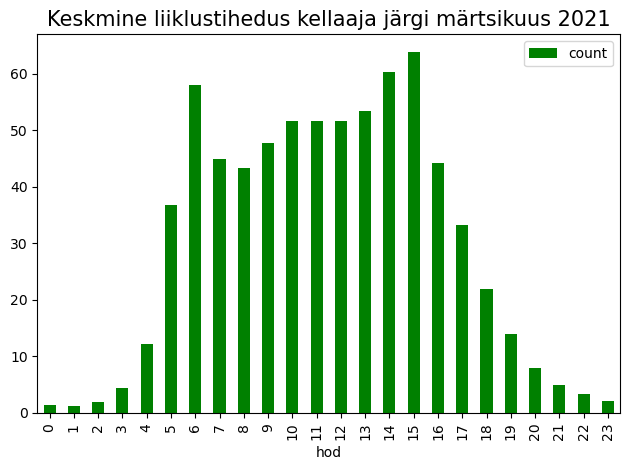

In [132]:
plt.style.use('default')

# fix, ax = plt.subplots(figsize=(15,9),)
# plt.rc('legend',fontsize=50)
# plt.rcParams.update({'legend.fontsize':20})

ax = agg_traffic_data_hours_df.plot(kind='bar', color="green" )
#plt.legend(["kesmine liiklustihedus"], fontsize=15)
plt.title("Keskmine liiklustihedus kellaaja järgi märtsikuus 2021", fontsize=15)

plt.tight_layout()
plt.savefig("traffix_all_hour_day.png")

<AxesSubplot:xlabel='hour_of_day'>

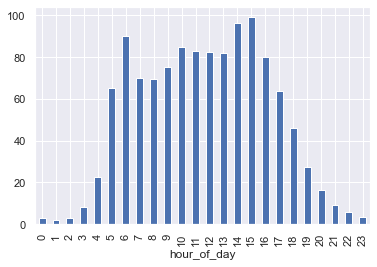

In [42]:
narva_lk.groupby(by='hour_of_day')['count'].mean().plot(kind='bar')

In [43]:
narva_lk['day_of_week'] = narva_lk['datetime'].apply(lambda dtx: dtx.day_of_week)

<AxesSubplot:xlabel='day_of_week'>

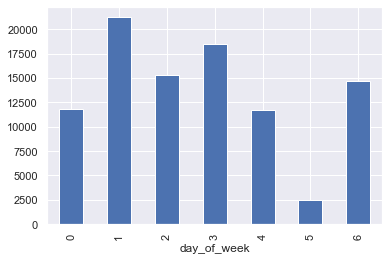

In [44]:
narva_lk.groupby(by='day_of_week')['count'].sum().plot(kind='bar')

<AxesSubplot:xlabel='day_of_week'>

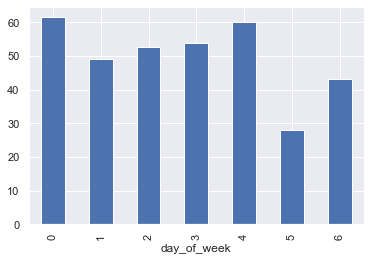

In [45]:
narva_lk.groupby(by='day_of_week')['count'].mean().plot(kind='bar')

In [46]:
len(narva_lk['geometry'].unique() )

6

In [47]:
narva_lk['wkt'] = narva_lk['geometry'].apply(lambda g: g.wkt)

<AxesSubplot:xlabel='wkt'>

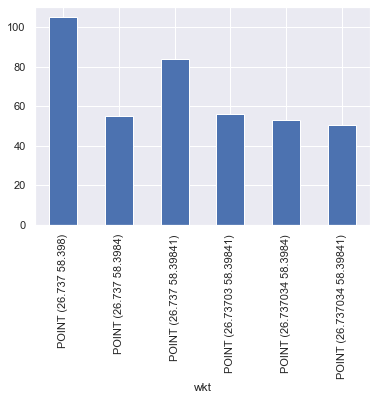

In [48]:
narva_lk.groupby(by='wkt')['count'].mean().plot(kind='bar')

In [49]:
narva_lk['count'].describe()

count    1881.000000
mean       50.855928
std        47.868525
min         0.000000
25%         4.000000
50%        40.000000
75%        91.000000
max       250.000000
Name: count, dtype: float64

<AxesSubplot:>

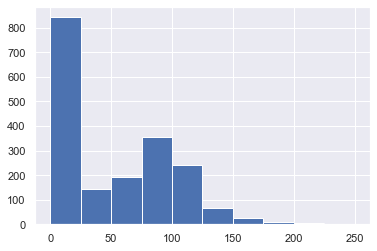

In [50]:
narva_lk['count'].hist()

In [51]:
traffic_data['day_of_week'] = traffic_data['datetime'].apply(lambda dtx: dtx.day_of_week)

tuesday_traffic = traffic_data.loc[traffic_data['day_of_week'] == 1].copy()

tuesday_traffic['wkt'] = tuesday_traffic['geometry'].apply(lambda g: g.wkt)

In [79]:
def between_times(df, begin_time, end_time, data_colname="datetime"):
    dfx = df.loc[df[data_colname] > begin_time]
    dfx = dfx.loc[dfx[data_colname] < end_time]
    return dfx.copy()

In [80]:
tuesday_traffic.sample(3)

,name,count,lane,objectid,time,text_time,geometry,datetime,day_of_week,wkt
871,LKL_Riia_mnt_LV,65,1,299395,1616512500041,2021-03-23 15:15:00,POINT (26.68334 58.35815),2021-03-23 15:15:00,1,POINT (26.68334 58.358147)
28634,LKL_Roomu,9,1,302802,1616526900041,2021-03-23 19:15:00,POINT (26.77778 58.37895),2021-03-23 19:15:00,1,POINT (26.777779 58.378952)
953,LKL_Ringtee_3,82,1,299532,1616513400041,2021-03-23 15:30:00,POINT (26.71438 58.34394),2021-03-23 15:30:00,1,POINT (26.71438 58.343937)


In [81]:
import datetime

test_df = between_times(tuesday_traffic, datetime.datetime(year=2021,month=3,day=23,hour=7,minute=59), datetime.datetime(year=2021,month=3,day=23,hour=8,minute=1), "datetime")

In [83]:
test_df.reset_index(drop=True).sample(3)

,name,count,lane,objectid,time,text_time,geometry,datetime,day_of_week,wkt
20,LKL_Ringtee_1,38,2,300866,1616486400041,2021-03-23 08:00:00,POINT (26.71427 58.34357),2021-03-23 08:00:00,1,POINT (26.714268 58.34357)
3,LKL_Rapina_mnt,40,2,299700,1616486400041,2021-03-23 08:00:00,POINT (26.79372 58.37365),2021-03-23 08:00:00,1,POINT (26.793718 58.373653)
24,LKL_Riia_mnt_LS,48,1,299883,1616486400041,2021-03-23 08:00:00,POINT (26.68342 58.35790),2021-03-23 08:00:00,1,POINT (26.683424 58.3579)


In [84]:
agg_traffic_day = []

for geom, sub_df in test_df.groupby(by='wkt'):
    all_counts = sub_df['count'].max()
    name = sub_df['name'].to_list()[0]
    agg_traffic_day.append( { 'name': name, 'count': all_counts, 'geometry': wkt.loads(geom)}  ) 

In [52]:
from shapely import wkt

agg_traffic_day = []

for geom, sub_df in tuesday_traffic.groupby(by='wkt'):
    all_counts = sub_df['count'].mean()
    name = sub_df['name'].to_list()[0]
    agg_traffic_day.append( { 'name': name, 'count': all_counts, 'geometry': wkt.loads(geom)}  ) 
    

In [85]:
tues_agg = pd.DataFrame(agg_traffic_day) 
tues_agg

,name,count,geometry
0,LKL_Tiksoja,17,POINT (26.654392 58.40841)
1,LKL_Ilmatsalu,96,POINT (26.678398 58.379086)
2,LKL_Viljandi_mnt,68,POINT (26.681198 58.367798)
3,LKL_Riia_mnt_LV,49,POINT (26.68334 58.358147)
4,LKL_Riia_mnt_LS,56,POINT (26.683424 58.3579)
5,LKL_Roopa,16,POINT (26.69739 58.348434)
6,LKL_Arukula,68,POINT (26.708223 58.40519)
7,LKL_Ringtee_1,38,POINT (26.714268 58.34357)
8,LKL_Voru,85,POINT (26.7143 58.3411)
9,LKL_Ringtee_1,88,POINT (26.7143 58.34357)


In [86]:
tues_agg_3301 = gpd.GeoDataFrame(tues_agg, geometry='geometry', crs=4326).to_crs(3301)

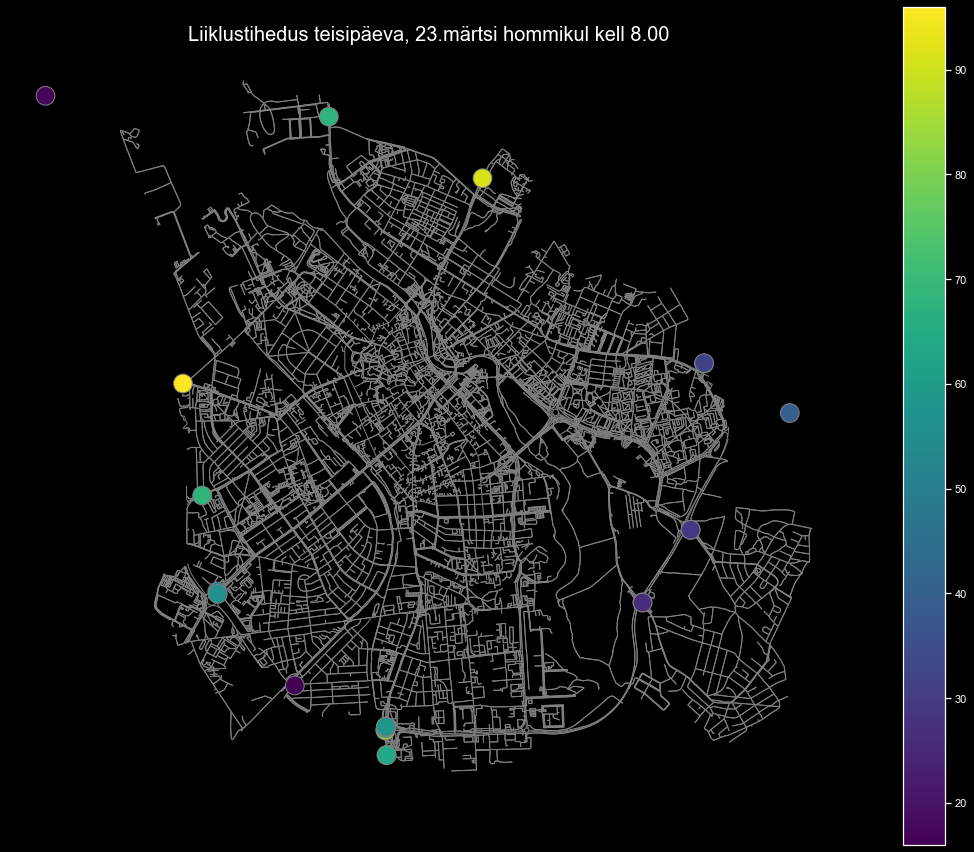

In [105]:
plt.style.use('dark_background')
# plt.style.use('default')
# plt.rc('legend',fontsize=50)

plt.rcParams.update({'legend.fontsize':50})
fig, ax = plt.subplots(figsize=(15,12))


# ax = streets_3301.plot(ax=ax, linewidth=2, alpha=0.9, column='speed', cmap='Greens_r')

ax = tues_agg_3301.plot(ax=ax, markersize=350, edgecolor='gray',
                   lw=1, column="count", cmap="viridis", zorder=15,
                  legend=True)

# lrg = ax.get_legend()
# plt.rc('legend',fontsize=50)

ax = streets_3301.plot(ax=ax, linewidth=1, color="gray", zorder=10)
# plt.axis('off')
ax.set_axis_off();

plt.title("Liiklustihedus teisipäeva, 23.märtsi hommikul kell 8.00", fontsize=20)
plt.tight_layout()
plt.savefig("traffix_tuesday23032021.png")